In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import msoffcrypto

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h1> 1. Wczytanie danych </h1>

In [2]:
def open_file(path: str) -> pd.DataFrame:
    decrypted_workbook = io.BytesIO()

    file = open(path, 'rb')
    office_file = msoffcrypto.OfficeFile(file)
    office_file.load_key('Pr$d_6_dat012')
    office_file.decrypt(decrypted_workbook)
    
    data = pd.read_excel(decrypted_workbook)
    return data

In [3]:
data = open_file("Lab6_data.xlsx")
data.head(10)

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
0,1050.0,3055,1531,1573,49766683317413,1.490218e-07,88,8.917627e+12,1.629024e+10
1,1050.1,3034,1517,1552,51917976630989,1.447758e-07,98,-4.181219e+13,1.711206e+10
2,1050.2,3025,1510,1539,52937501416995,1.421186e-07,101,-2.550837e+13,1.750000e+10
3,1050.3,3016,1504,1526,53973542181495,1.395260e-07,105,-5.251573e+13,1.789574e+10
4,1050.4,3030,1498,1523,54823457877834,1.388839e-07,106,-6.034015e+14,1.809355e+10
5,1050.5,3058,1493,1522,55684315391959,1.386300e-07,96,-1.640276e+14,1.820939e+10
6,1050.6,3085,1493,1521,55684315391959,1.383765e-07,106,-4.052963e+13,1.805002e+10
7,1050.7,3113,1493,1526,55684315391959,1.394453e-07,106,4.263216e+13,1.788767e+10
8,1050.8,3133,1506,1534,53589918434209,1.409694e-07,90,-7.115511e+13,1.710499e+10
9,1050.9,3147,1524,1551,50782540549249,1.444163e-07,86,-7.323396e+13,1.613681e+10


<h1> 2. Krotka eksploracyjna analiza danych </h1>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPT [MD]  5501 non-null   float64
 1   VP [m/s]   5501 non-null   int64  
 2   VSX [m/s]  5501 non-null   int64  
 3   VSY [m/s]  5501 non-null   int64  
 4   PAR1       5501 non-null   int64  
 5   PAR2       5501 non-null   float64
 6   PAR3       5501 non-null   int64  
 7   PAR4       5501 non-null   float64
 8   PAR5       5501 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 386.9 KB


In [5]:
data.describe()

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
count,5501.000000,5501.000000,5501.000000,5501.000000,5.501000e+03,5.501000e+03,5501.000000,5.501000e+03,5.501000e+03
mean,1325.000000,3438.722232,1778.546264,1806.961825,2.820698e+13,2.047514e-07,91.562261,-7.747425e+12,8.441844e+09
std,158.814625,218.656326,169.944724,172.490712,1.184023e+13,4.322203e-08,8.429687,4.695632e+14,4.025102e+09
min,1050.000000,2922.000000,1411.000000,1429.000000,7.239360e+12,1.208362e-07,71.000000,-1.119341e+16,1.755848e+09
25%,1187.500000,3253.000000,1627.000000,1660.000000,1.818570e+13,1.678445e-07,85.000000,-2.647683e+13,5.083176e+09
50%,1325.000000,3439.000000,1768.000000,1807.000000,2.602817e+13,2.021725e-07,92.000000,-8.689318e+11,7.557726e+09
75%,1462.500000,3600.000000,1911.000000,1929.000000,3.794837e+13,2.335539e-07,98.000000,2.496423e+13,1.167083e+10
max,1600.000000,4123.000000,2319.000000,2389.000000,7.163776e+13,3.742931e-07,114.000000,9.500925e+15,2.373683e+10


<h2> 2.1 Macierz korelacji <h2>

<AxesSubplot:>

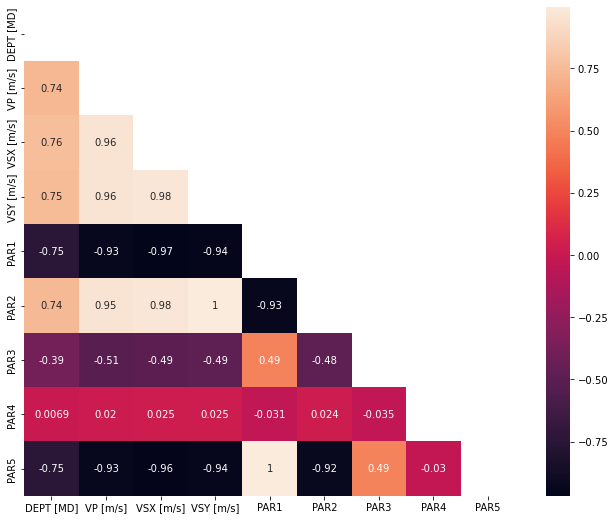

In [6]:
corr = data.corr()

f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot = True)

Na podstawie macierzy korelacji widzimy, ze wystepuje korelacja miedzy VP a PAR5 (ujemna -0.93), miedzy PAR4 w zasadzie jej nie ma (0.02), dla PAR3 wynosi -0.51, PAR2 silna korelacja dodatnia (0.95), dla PAR1 podobnie jak dla PAR5 mamy -0.93.

<Figure size 432x288 with 0 Axes>

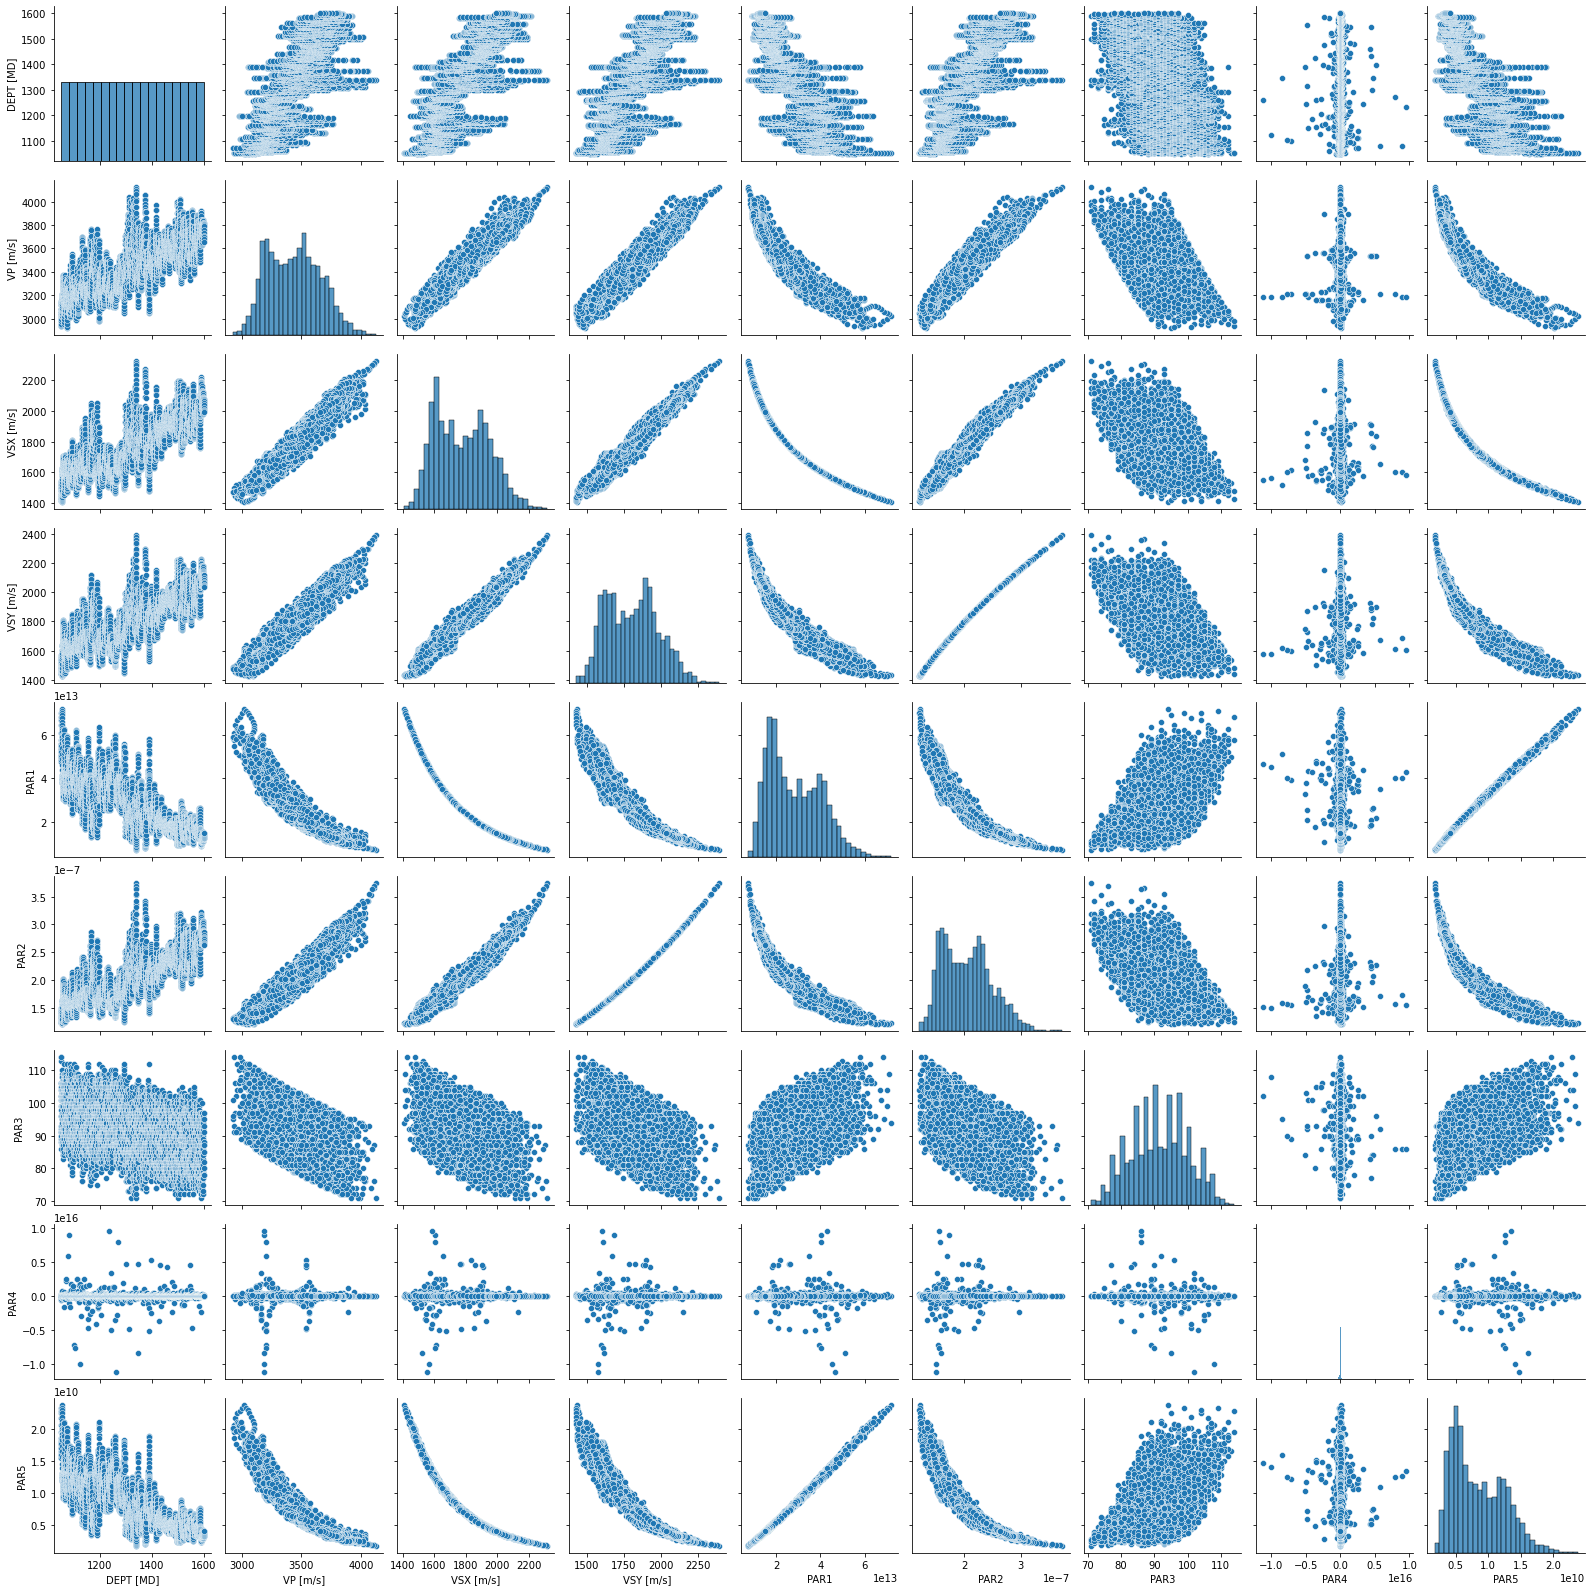

In [7]:
plt.figure()
sns.pairplot(data)
plt.show()

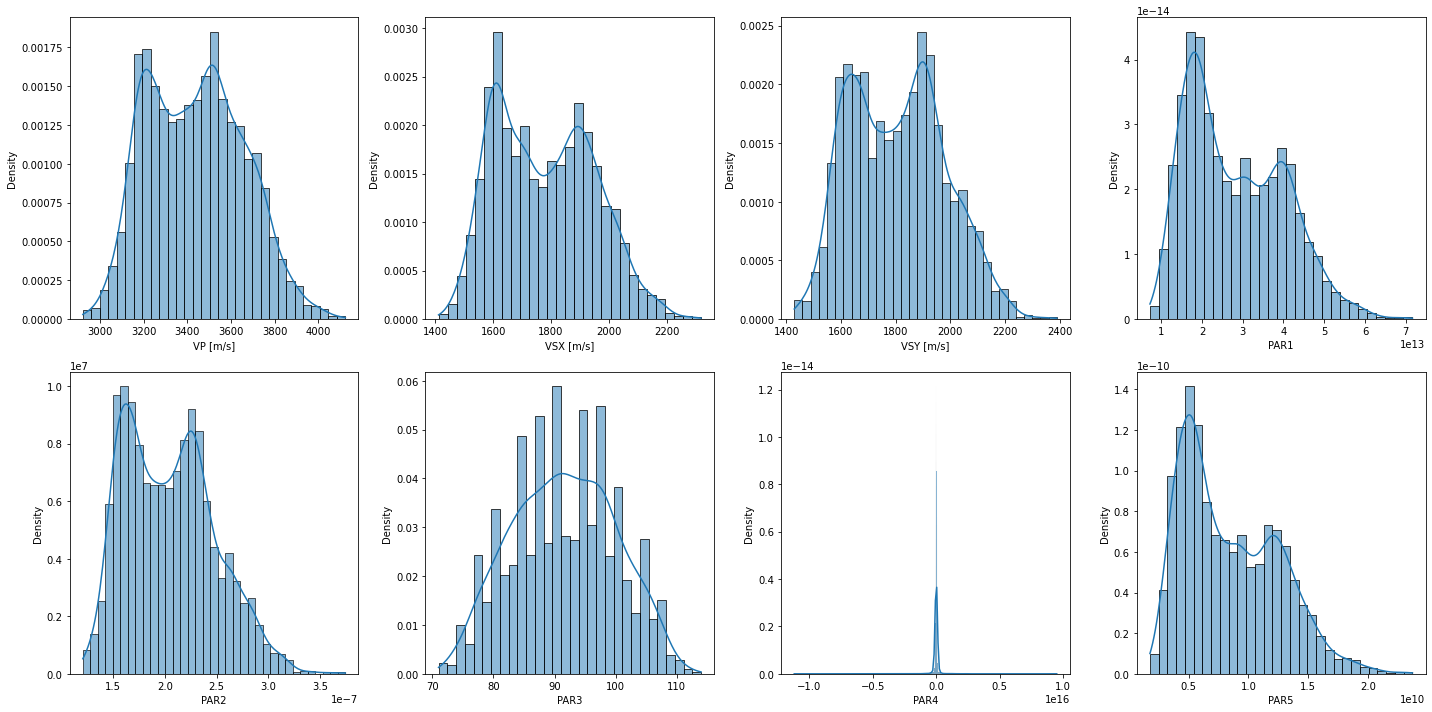

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(data.columns[1:], axes):
    sns.histplot(data=data[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()

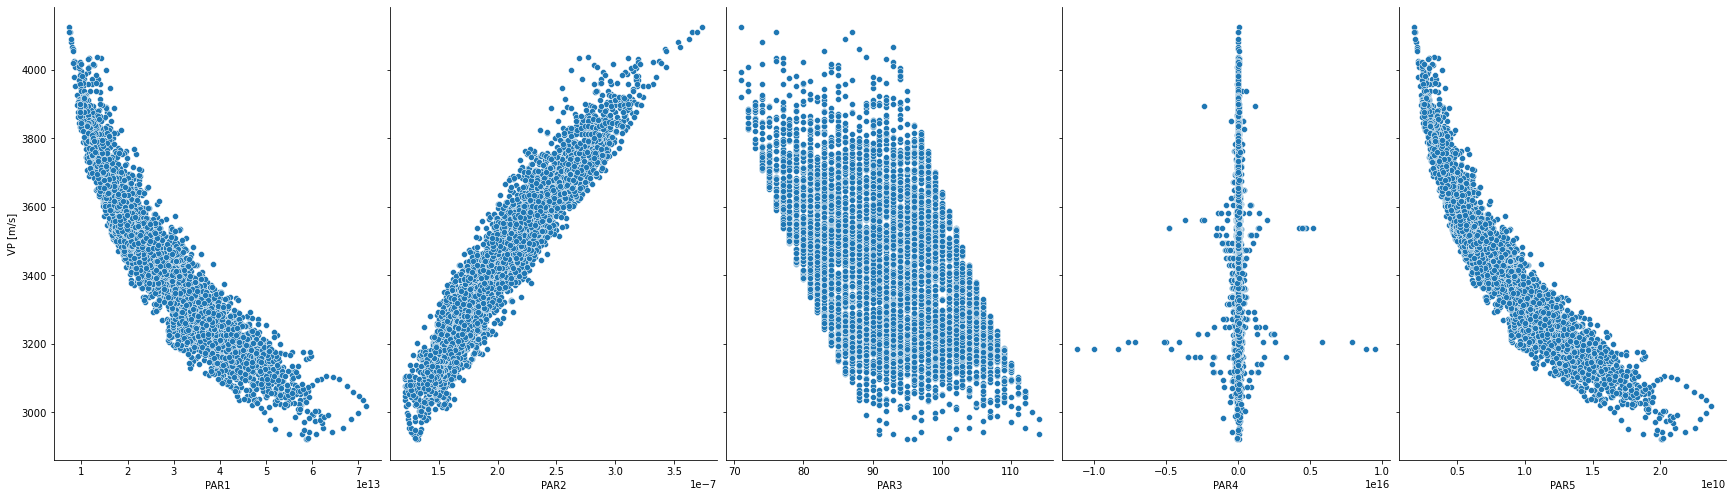

In [9]:
p = sns.pairplot(data, x_vars=['PAR1','PAR2','PAR3', 'PAR4', 'PAR5'], y_vars='VP [m/s]', height = 7, aspect = 0.7)

Na podstawie powyzszych badan do dalszej budowy modelu wybieram PAR2 oraz PAR3. PAR4 odrzucam ze wzgledu na brak wspoliniowosci, PAR5 oraz PAR1 ze wzgledu na wysoka korelacje (powyzej 0.8) z parametrem PAR2. W celu dalszej pracy tworzymy kopie danych, ktora zmodyfikujemy wedle potrzeb. 

In [10]:
data_copy = data.copy()
data_copy.rename(columns = {'DEPT [MD]' : 'DEPT','VP [m/s]':'VP'}, inplace = True)
data_copy.drop(columns = ['VSX [m/s]', 'VSY [m/s]', 'PAR4', 'PAR5', 'PAR1'], inplace = True)
data_copy.head(10)

,DEPT,VP,PAR2,PAR3
0,1050.0,3055,1.490218e-07,88
1,1050.1,3034,1.447758e-07,98
2,1050.2,3025,1.421186e-07,101
3,1050.3,3016,1.395260e-07,105
4,1050.4,3030,1.388839e-07,106
5,1050.5,3058,1.386300e-07,96
6,1050.6,3085,1.383765e-07,106
7,1050.7,3113,1.394453e-07,106
8,1050.8,3133,1.409694e-07,90
9,1050.9,3147,1.444163e-07,86


<h1> 3. Model prostej regresji liniowej z wykorzystaniem tylko PAR2 </h1>

In [11]:
regressor = LinearRegression()
scaler = StandardScaler()

X = data_copy['PAR2'].values.reshape(-1, 1)
y = data_copy['VP'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor.fit(X_train_scaled, y_train)

print(f"Train score: {regressor.score(X_train_scaled, y_train)*100:.2f}%\nTest score: {regressor.score(X_test_scaled, y_test)*100:.2f}%")

Train score: 90.98%
Test score: 90.90%


Wyniki modelu (jak na tak prosty model) wydaja sie byc niezle - wynik wspolczynnika determinacji r^2 wynosi ponad 90%.

<h1> 4. Zalozenia regresji liniowej dla powyzszego modelu </h1>

<h2> 4.1 Srednia rezyduow </h2>

In [12]:
y_pred = regressor.predict(X_test_scaled)

residuals = y_test - y_pred
print(f'Srednia rezyduow wynosi {np.mean(residuals):.2f}')

Srednia rezyduow wynosi 1.70


<h2> 4.2 Sprawdzenie homoskedastycznosci </h2>

Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

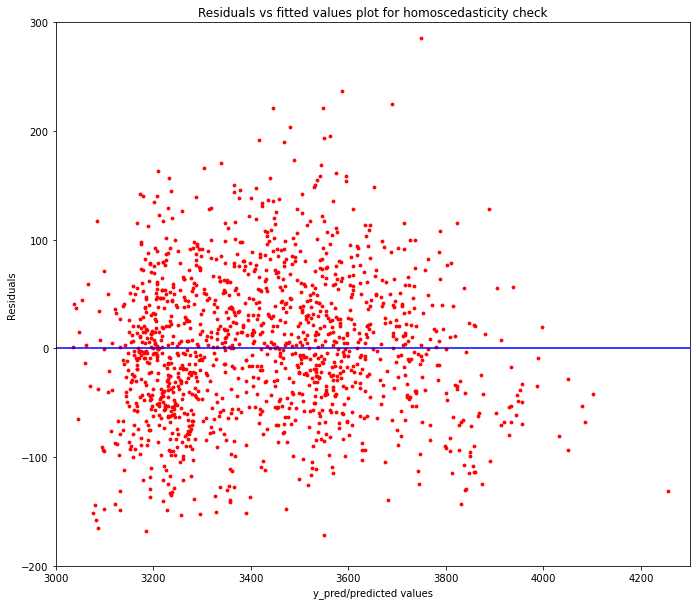

In [13]:
plt.subplots(12, figsize = (25, 10))
plt.subplot(121).scatter(y_pred, residuals, color = 'red', s = 8)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-200, 300)
plt.xlim(3000, 4300)
sns.lineplot(x = [3000, 4400], y = [0, 0], color = 'blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [14]:
from scipy.stats import bartlett

test = bartlett( np.ravel(X_train_scaled), np.ravel(residuals))
print(test)

BartlettResult(statistic=27025.361700839043, pvalue=0.0)


<h2> 4.3 Sprawdzenie rozkladu rezyduow </h2>

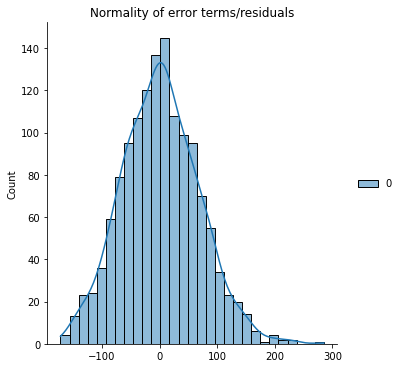

In [15]:
p = sns.displot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

Rozklad rezyduow czesciowo przypomina rozklad normalny - jest wezszy i bardziej "stromy" niz Gaussowski.

<h2> 4.4 Sprawdzenie autokorelacji rezyduow </h2>

<AxesSubplot:xlabel='y_pred/predicted values', ylabel='Residuals'>

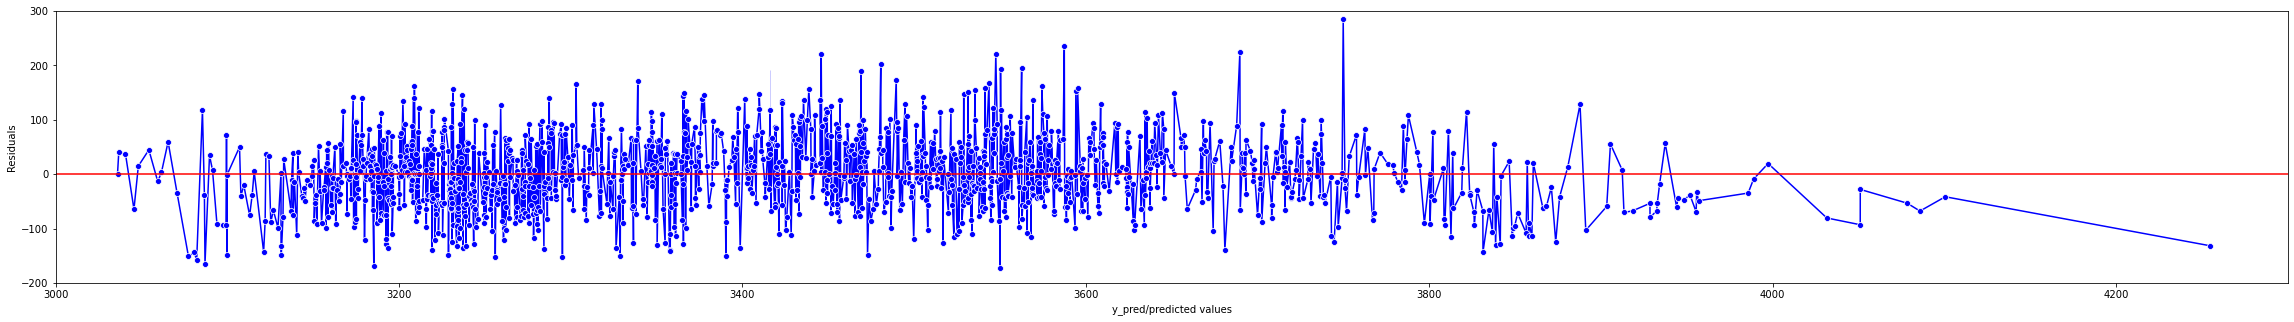

In [16]:
plt.figure(figsize=(40,5))

sns.lineplot(x = np.ravel(y_pred), y = np.ravel(residuals), marker='o', color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-200, 300)
plt.xlim(3000, 4300)
sns.lineplot(x = [3000, 4400], y = [0, 0], color = 'red')

Nie widac zadnego wzorca pomiedzy rezyduami, wiec nie wystepuje ich autokorelacja.

In [17]:
from statsmodels.stats import diagnostic as diag

min(diag.acorr_ljungbox(residuals , lags = 40)[1])

/home/wildfire/anaconda3/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.14079203273350283

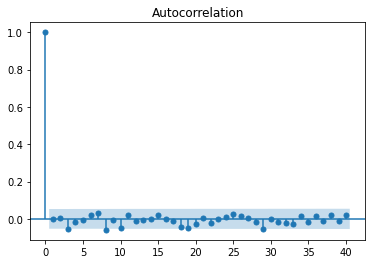

In [18]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

Wartosc p.value wynosi 0.14079203273350283, dodatkowo powyzszy wykres pokazuje, ze wszystkie kropki mieszcza sie w niebieskim przedziale ufnosci. Mozemy stwierdzic, ze nie wystepuja oznaki autokorelacji.

**Podsumowujac nie wszystkie zalozenia regresji liniowej zostaly spelnione.** Srednia rezyduow powinna wynosic 0, w naszym przypadku jest to 1.7, wariancja rezyduow powinna byc identyczna lub bardzo podobna - dla naszego modelu dosc mocno waha sie wzgledem wyrysowanej linii, dodatkowo p value w tescie Barlett'a wyszlo duzo mniejsze, niz 0.05 co oznacza, ze odrzucamy hipoteze zerowa o homoskedastycznosci.

<h1> 4.5 Wizualizacja wynikow modelu </h1>

Text(0, 0.5, 'VP [m/s]')

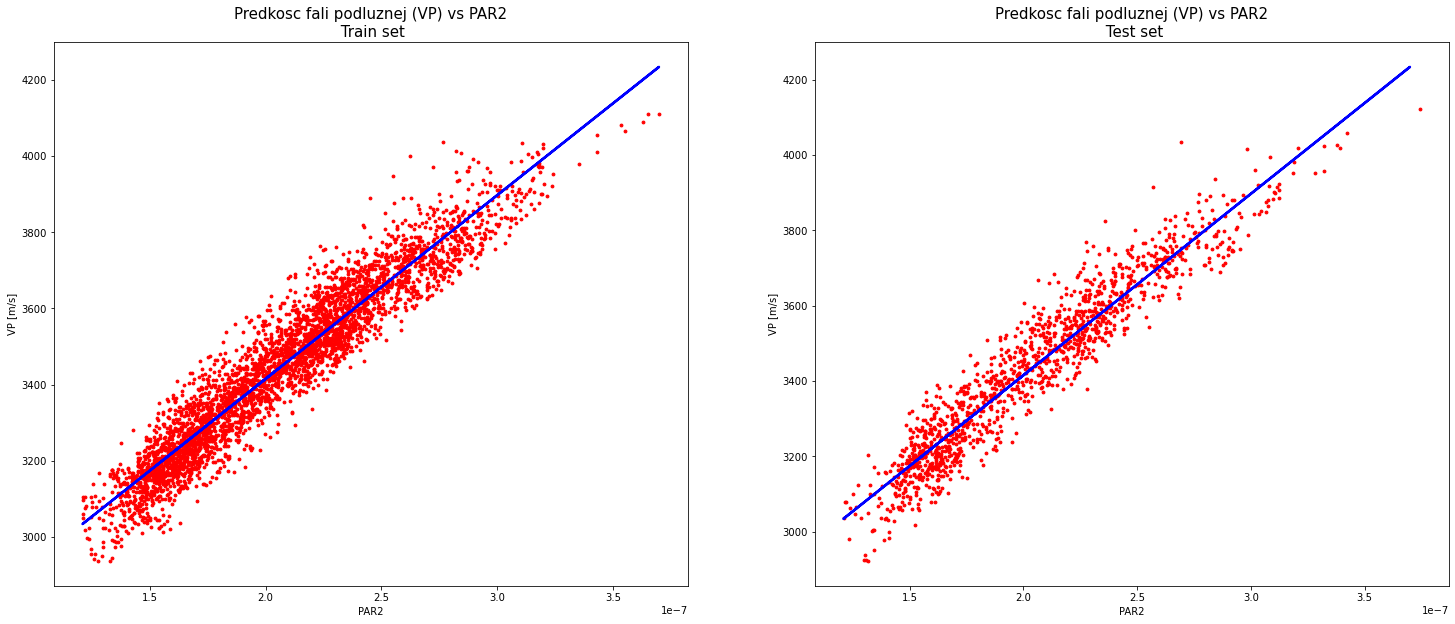

In [19]:
plt.subplots(12, figsize = (25, 10))
plt.subplot(121).scatter(X_train, y_train, color = 'red', s = 8)
plt.plot(X_train, regressor.predict(X_train_scaled), color = 'blue', linewidth = 2.5)
plt.title('Predkosc fali podluznej (VP) vs PAR2\n Train set', fontsize = 15)
plt.xlabel('PAR2')
plt.ylabel('VP [m/s]')

plt.subplot(122).scatter(X_test, y_test, color = 'red', s = 8)
plt.plot(X_train, regressor.predict(X_train_scaled), color = 'blue', linewidth = 2.5)
plt.title('Predkosc fali podluznej (VP) vs PAR2\n Test set', fontsize = 15)
plt.xlabel('PAR2')
plt.ylabel('VP [m/s]')

<h1> 5. Model regresji wielorakiej </h1>

Porownanie magnitud parametrow PAR2 oraz PAR3

In [20]:
data_copy[['PAR2', 'PAR3']][:20]

,PAR2,PAR3
0,1.490218e-07,88
1,1.447758e-07,98
2,1.421186e-07,101
3,1.395260e-07,105
4,1.388839e-07,106
5,1.386300e-07,96
6,1.383765e-07,106
7,1.394453e-07,106
8,1.409694e-07,90
9,1.444163e-07,86


In [21]:
regressor = LinearRegression()
scaler = StandardScaler()

X = data_copy[['PAR2', 'PAR3']].values
y = data_copy['VP'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

regressor.fit(X_train_scaled, y_train)

print(f"Train score: {regressor.score(X_train_scaled, y_train)*100:.2f}%\nTest score: {regressor.score(X_test_scaled, y_test)*100:.2f}%")

Train score: 91.34%
Test score: 91.20%


Wyniki wspolczynnika determinacji sa nieco lepsze, niz dla modelu prostej regresji liniowej i wynosza ponad 91%.

<h1> 5.1 Wizualizacja wynikow modelu </h1>

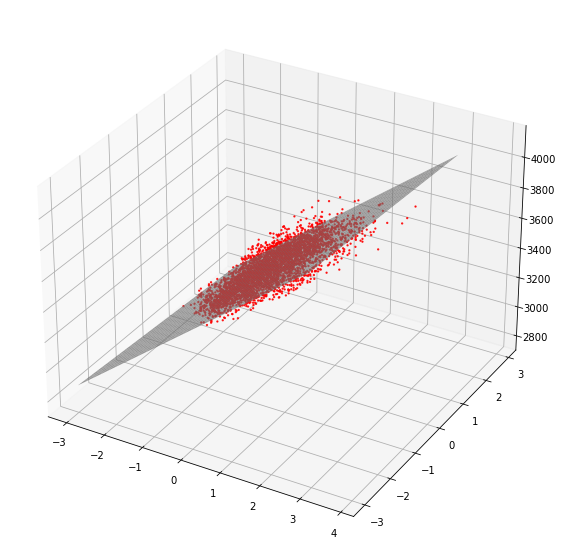

In [22]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')

x_range = np.arange(-3, 3, 0.1)
y_range = np.arange(-3, 3, 0.1)

XX, yy = np.meshgrid(x_range, y_range)

z = XX * regressor.coef_[0] + yy * regressor.coef_[1] + regressor.intercept_

ax.scatter(X_train_scaled[:,0], X_train_scaled[:,1], y_train, s = 1.7, color = 'red', alpha = 0.8)
ax.plot_surface(XX, yy, z, color = 'gray', alpha = 0.7)

<h1> Podsumowanie </h1>

Podsumowujac, **jako model produkcyjny zaproponowalbym model regresji wielowymiarowej** ze wzgledu na lepsze rezultaty i niewiele wieksze skomplikowanie (uzyta zostala jedna dodatkowa zmienna wzgledem modelu prostej regresji). Natomiast mozemy powiedziec, ze model prostej regresji liniowej w stosunku do swojej prostoty rowniez poradzil sobie calkiem dobrze.